In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import cifar10

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


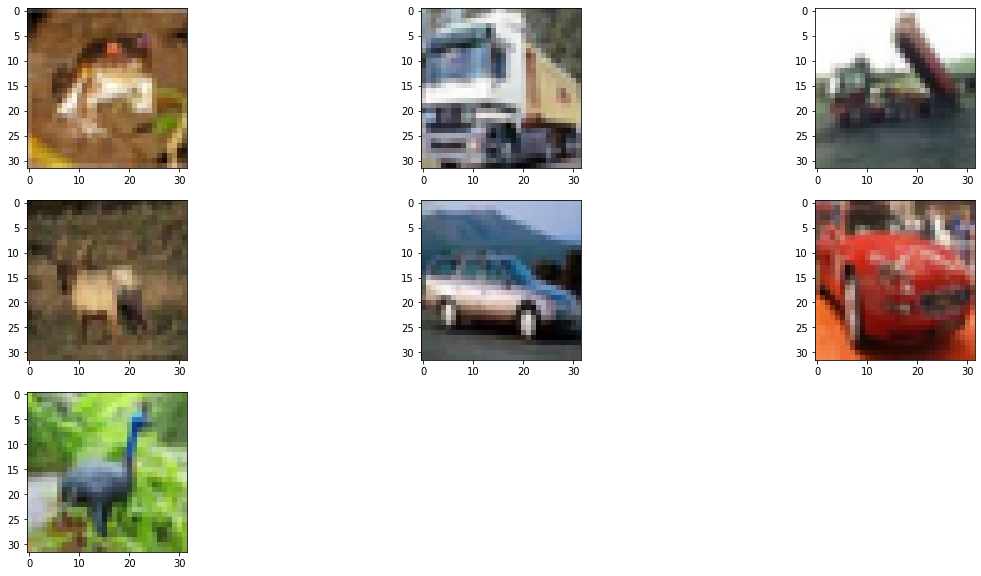

In [5]:
n = 7
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i])
plt.show()

In [6]:
pip install optimizers

  Preparing metadata (setup.py) ... - done
  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2284 sha256=1c76af76112590dcc9df10a70f9ee904515455dfbe029545943a28b71cb9282e
  Stored in directory: /root/.cache/pip/wheels/56/a5/4d/f679a391b5fca0b18c5e2fcd66ebff8900d97d6d95713915b9
Successfully built optimizers
Note: you may need to restart the kernel to use updated packages.


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

## Converting train and test pixels values to float

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Normalizing the data

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

## Performing one-hot-encoding for target variable

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
output_classes = y_test.shape[1]

In [12]:
output_classes

10

## Model Building

In [13]:
model = Sequential()

2022-12-11 11:19:21.163908: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Add the Layers

In [14]:
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding='same', activation='relu', 
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(output_classes,activation='softmax'))

In [15]:
sgd = SGD(lr=0.01,momentum=0.9,decay=(0.01/25), nesterov=False)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20,batch_size=32)

2022-12-11 11:19:22.909815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1563/1563 [==============================] - 84s 53ms/step - loss: 1.7394 - accuracy: 0.3705 - val_loss: 1.4631 - val_accuracy: 0.4738
Epoch 2/20
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3850 - accuracy: 0.5022 - val_loss: 1.2335 - val_accuracy: 0.5582
Epoch 3/20
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2148 - accuracy: 0.5693 - val_loss: 1.1330 - val_accuracy: 0.5927
Epoch 4/20
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0994 - accuracy: 0.6088 - val_loss: 1.0764 - val_accuracy: 0.6158
Epoch 5/20
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0058 - accuracy: 0.6407 - val_loss: 1.0185 - val_accuracy: 0.6363
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9284 - accuracy: 0.6717 - val_loss: 0.9885 - val_accuracy: 0.6482
Epoch 7/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8552 - accuracy: 0.6984 - val_loss: 0.9903 -

In [19]:
_,accuracy=model.evaluate(X_test,y_test)
print(accuracy*100)

313/313 [==============================] - 4s 11ms/step - loss: 1.0047 - accuracy: 0.6913
69.12999749183655
